# Sonar, Mines vs. Rocks
## The task is to predict class of the input (classification problem).
### Dataset Sonar, Mines vs. Rocks.

# Import libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.pipeline import Pipeline

%matplotlib inline

# Read dataset

In [4]:
data = pd.read_csv('sonar.csv',header=None)
data.rename(columns={60:'class'},inplace=True)
pd.set_option('precision',3)
pd.set_option('max_columns',None)

# Descriptive statistics

In [5]:
data.head(10)
# we can see that values are on the same scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,class
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,0.161,0.158,0.224,0.065,0.066,0.227,0.310,0.300,0.508,0.480,0.578,0.507,0.433,0.555,0.671,0.641,0.710,0.808,0.679,0.386,0.131,0.260,0.512,0.755,0.854,0.851,0.669,0.610,0.494,0.274,0.051,0.283,0.282,0.426,0.264,0.139,0.105,0.134,0.038,0.032,0.023,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,0.492,0.655,0.692,0.780,0.746,0.944,1.000,0.887,0.802,0.782,0.521,0.405,0.396,0.391,0.325,0.320,0.327,0.277,0.442,0.203,0.379,0.295,0.198,0.234,0.131,0.418,0.384,0.106,0.184,0.197,0.167,0.058,0.140,0.163,0.062,0.020,0.053,0.074,0.041,0.006,0.013,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,0.633,0.706,0.554,0.532,0.648,0.693,0.676,0.755,0.893,0.862,0.797,0.674,0.429,0.365,0.533,0.241,0.507,0.853,0.604,0.851,0.851,0.504,0.186,0.271,0.423,0.304,0.612,0.676,0.537,0.472,0.465,0.259,0.213,0.222,0.211,0.018,0.135,0.074,0.013,0.011,0.003,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,0.088,0.199,0.018,0.226,0.173,0.213,0.069,0.228,0.406,0.397,0.274,0.369,0.556,0.485,0.314,0.533,0.526,0.252,0.209,0.356,0.626,0.734,0.612,0.350,0.395,0.301,0.541,0.881,0.986,0.917,0.612,0.501,0.321,0.320,0.429,0.365,0.266,0.158,0.068,0.029,0.024,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,0.415,0.395,0.426,0.413,0.453,0.533,0.731,0.619,0.203,0.464,0.415,0.429,0.573,0.540,0.316,0.229,0.700,1.000,0.726,0.472,0.510,0.546,0.288,0.098,0.195,0.418,0.460,0.322,0.283,0.243,0.198,0.244,0.185,0.084,0.069,0.053,0.036,0.009,0.023,0.005,0.016,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R
5,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,0.299,0.425,0.634,0.820,1.000,0.999,0.951,0.902,0.723,0.512,0.207,0.399,0.589,0.287,0.204,0.578,0.539,0.375,0.341,0.507,0.558,0.478,0.330,0.220,0.141,0.286,0.381,0.416,0.405,0.330,0.271,0.265,0.072,0.124,0.119,0.109,0.062,0.049,0.026,0.008,0.010,0.004,0.001,0.004,0.001,0.009,0.006,0.003,0.005,0.006,R
6,0.032,0.096,0.132,0.141,0.167,0.171,0.073,0.140,0.208,0.351,0.179,0.066,0.051,0.375,0.542,0.544,0.515,0.426,0.202,0.423,0.772,0.974,0.939,0.556,0.527,0.683,0.571,0.543,0.218,0.215,0.581,0.632,0.296,0.187,0.297,0.516,0.615,0.428,0.548,0.613,0.502,0.238,0.196,0.175,0.130,0.060,0.112,0.105,0.051,0.016,0.019,0.020,0.025,0.013,0.007,0.014,0.009,0.014,0.004,0.010,R
7,0.052,0.055,0.084,0.032,0.116,0.092,0.103,0.061,0.146,0.284,0.280,0.309,0.266,0.380,0.563,0.438,0.262,0.120,0.668,0.940,0.783,0.535,0.681,0.917,0.761,0.822,0.887,0.609,0.297,0.110,0.132,0.062,0.099,0.401,0.367,0.105,0.192,0.393,0.429,0.255,0.115,0.220,0.188,0.144,0.215,0.236,0.113,0.025,0.029,0.018,0.005,0.008,0.012,0.004,0.012,0.010,0.009,0.005,0.005,0.005,R
8,0.022,0.037,0.048,0.048,0.065,0.059,0.075,0.010,0.068,0.149,0.116,0.165,0.383,0.360,0.171,0.114,0.035,0.380,0.740,0.993,0.980,0.889,0.671,0.429,0.337,0.737,0.961,0.735,0.486,0.159,0.301,0.410,0.317,0.331,0.341,0.219,0.246,0.273,0.168,0.279,0.256,0.174,0.212,0.110,0.099,0.127,0.146,0.116,0.078,0.044,0.006,0.015,0.013,0.015,0.006,0.005,0.006,0.009,0.006,0.002,R
9,0.016,0.017,0.035,0.007,0.019,0.067,0.106,0.070,0.096,0.025,0.080,0.106,0.127,0.089,0.020,0.113,0.283,0.323,0.324,0.433,0.607,0.765,0.920,0.972,0.921,0.754,0.829,0.891,0.731,0.690,0.583,0.493,0.310,0.031,0.024,0.111,0.159,0.137,0.070,0.045,0.062,0.142,0.160,0.138,0.037,0.069,0.087,0.051,0.009,0.020,0.012,0.009,0.022,0.018,0.008,0.007,0.003,0.004,0.006,0.004,R


In [6]:
data.shape
# too many columns for such number of rows (feature selection?)

(208, 61)

In [7]:
data.info()
# no null values and also all columns for training are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0        208 non-null float64
1        208 non-null float64
2        208 non-null float64
3        208 non-null float64
4        208 non-null float64
5        208 non-null float64
6        208 non-null float64
7        208 non-null float64
8        208 non-null float64
9        208 non-null float64
10       208 non-null float64
11       208 non-null float64
12       208 non-null float64
13       208 non-null float64
14       208 non-null float64
15       208 non-null float64
16       208 non-null float64
17       208 non-null float64
18       208 non-null float64
19       208 non-null float64
20       208 non-null float64
21       208 non-null float64
22       208 non-null float64
23       208 non-null float64
24       208 non-null float64
25       208 non-null float64
26       208 non-null float64
27       208 non-null float64
28       208 non-null float64
29       208 non-null flo

In [8]:
data.describe()
# because of differing means we may try to standardize the data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,0.236,0.250,0.273,0.297,0.320,0.378,0.416,0.452,0.505,0.563,0.609,0.624,0.647,0.673,0.675,0.700,0.702,0.694,0.642,0.581,0.504,0.439,0.417,0.403,0.393,0.385,0.364,0.340,0.326,0.311,0.289,0.278,0.247,0.214,0.197,0.161,0.122,0.091,0.052,0.020,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,0.133,0.140,0.141,0.164,0.205,0.233,0.264,0.262,0.258,0.263,0.258,0.256,0.250,0.239,0.245,0.237,0.246,0.237,0.240,0.221,0.214,0.213,0.207,0.231,0.259,0.264,0.240,0.213,0.199,0.179,0.171,0.169,0.139,0.133,0.152,0.134,0.087,0.062,0.036,0.014,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,0.029,0.024,0.018,0.027,0.003,0.016,0.035,0.037,0.049,0.066,0.051,0.022,0.056,0.024,0.024,0.092,0.048,0.028,0.014,0.061,0.048,0.040,0.048,0.021,0.022,0.008,0.035,0.038,0.037,0.012,0.036,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,0.129,0.133,0.166,0.175,0.165,0.196,0.206,0.242,0.299,0.351,0.400,0.407,0.450,0.541,0.526,0.544,0.532,0.535,0.464,0.411,0.346,0.281,0.258,0.218,0.179,0.154,0.160,0.174,0.174,0.186,0.163,0.159,0.155,0.127,0.094,0.069,0.064,0.045,0.026,0.012,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,0.225,0.249,0.264,0.281,0.282,0.305,0.308,0.368,0.435,0.542,0.618,0.665,0.700,0.699,0.721,0.754,0.746,0.732,0.681,0.607,0.490,0.430,0.391,0.351,0.313,0.321,0.306,0.313,0.283,0.278,0.260,0.245,0.223,0.178,0.148,0.121,0.102,0.078,0.045,0.018,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,0.302,0.331,0.351,0.386,0.453,0.536,0.659,0.679,0.731,0.809,0.817,0.832,0.849,0.872,0.874,0.894,0.917,0.900,0.852,0.735,0.642,0.580,0.556,0.596,0.593,0.557,0.519,0.441,0.435,0.424,0.388,0.384,0.325,0.272,0.232,0.200,0.154,0.120,0.069,0.025,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,0.734,0.706,0.713,0.997,1.000,0.999,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.966,0.931,1.000,0.965,1.000,1.000,0.950,1.000,0.986,0.930,0.899,0.825,0.773,0.776,0.703,0.729,0.552,0.334,0.198,0.083,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [9]:
data.groupby('class').size()
# slightly more examples of M

class
M    111
R     97
dtype: int64

In [10]:
data.skew()
# some values have skew more that +-2

0     2.131
1     2.156
2     2.653
3     3.402
4     2.018
5     1.248
6     0.971
7     1.481
8     1.634
9     1.281
10    0.988
11    0.589
12    0.737
13    1.022
14    0.764
15    0.695
16    0.654
17    0.526
18    0.283
19   -0.085
20   -0.253
21   -0.392
22   -0.594
23   -0.692
24   -0.789
25   -0.672
26   -0.628
27   -0.615
28   -0.442
29   -0.132
30    0.260
31    0.313
32    0.424
33    0.563
34    0.592
35    0.620
36    0.677
37    1.033
38    0.909
39    0.861
40    0.864
41    0.860
42    0.909
43    1.235
44    1.367
45    1.707
46    1.790
47    1.278
48    1.273
49    1.762
50    2.716
51    2.094
52    1.061
53    1.093
54    1.790
55    1.781
56    1.653
57    2.098
58    1.738
59    2.776
dtype: float64

# Data visualizations

# Histograms and lineplots to look at the distributions of the attributes

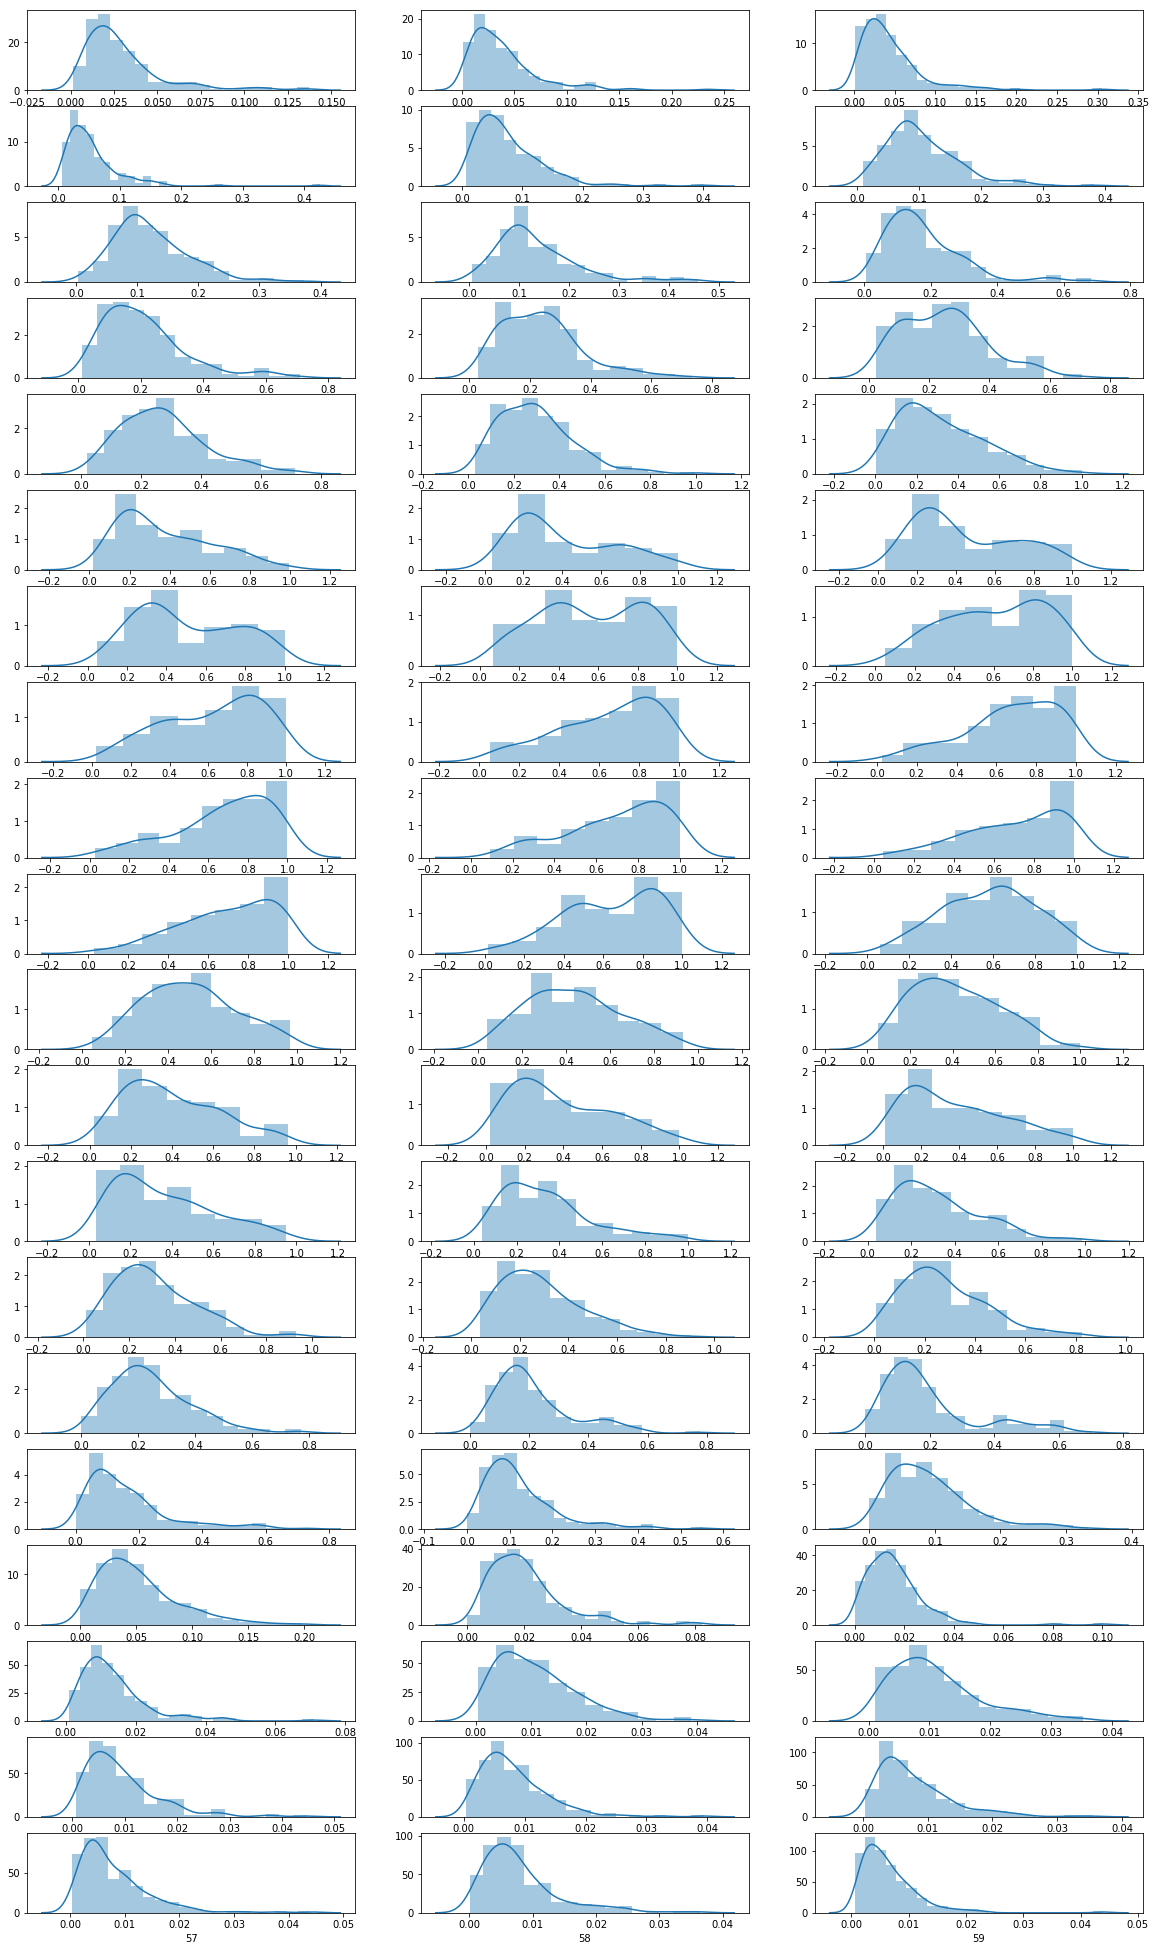

In [11]:
n_rows, n_cols = 20, 3
fig, axes = plt.subplots(ncols=n_cols,nrows=n_rows,sharex=False,sharey=False,figsize=(20,35))

curr_row, curr_col = 0, 0
for name in data.columns[:len(data.columns)-1]:
    sns.distplot(a=data[name],ax=axes[curr_row][curr_col])
    curr_col+=1
    if curr_col==n_cols:
        curr_row+=1
        curr_col=0
        
# looks like many columns have exponential distribution, some also have Gaussian

# Lineplots of attributes

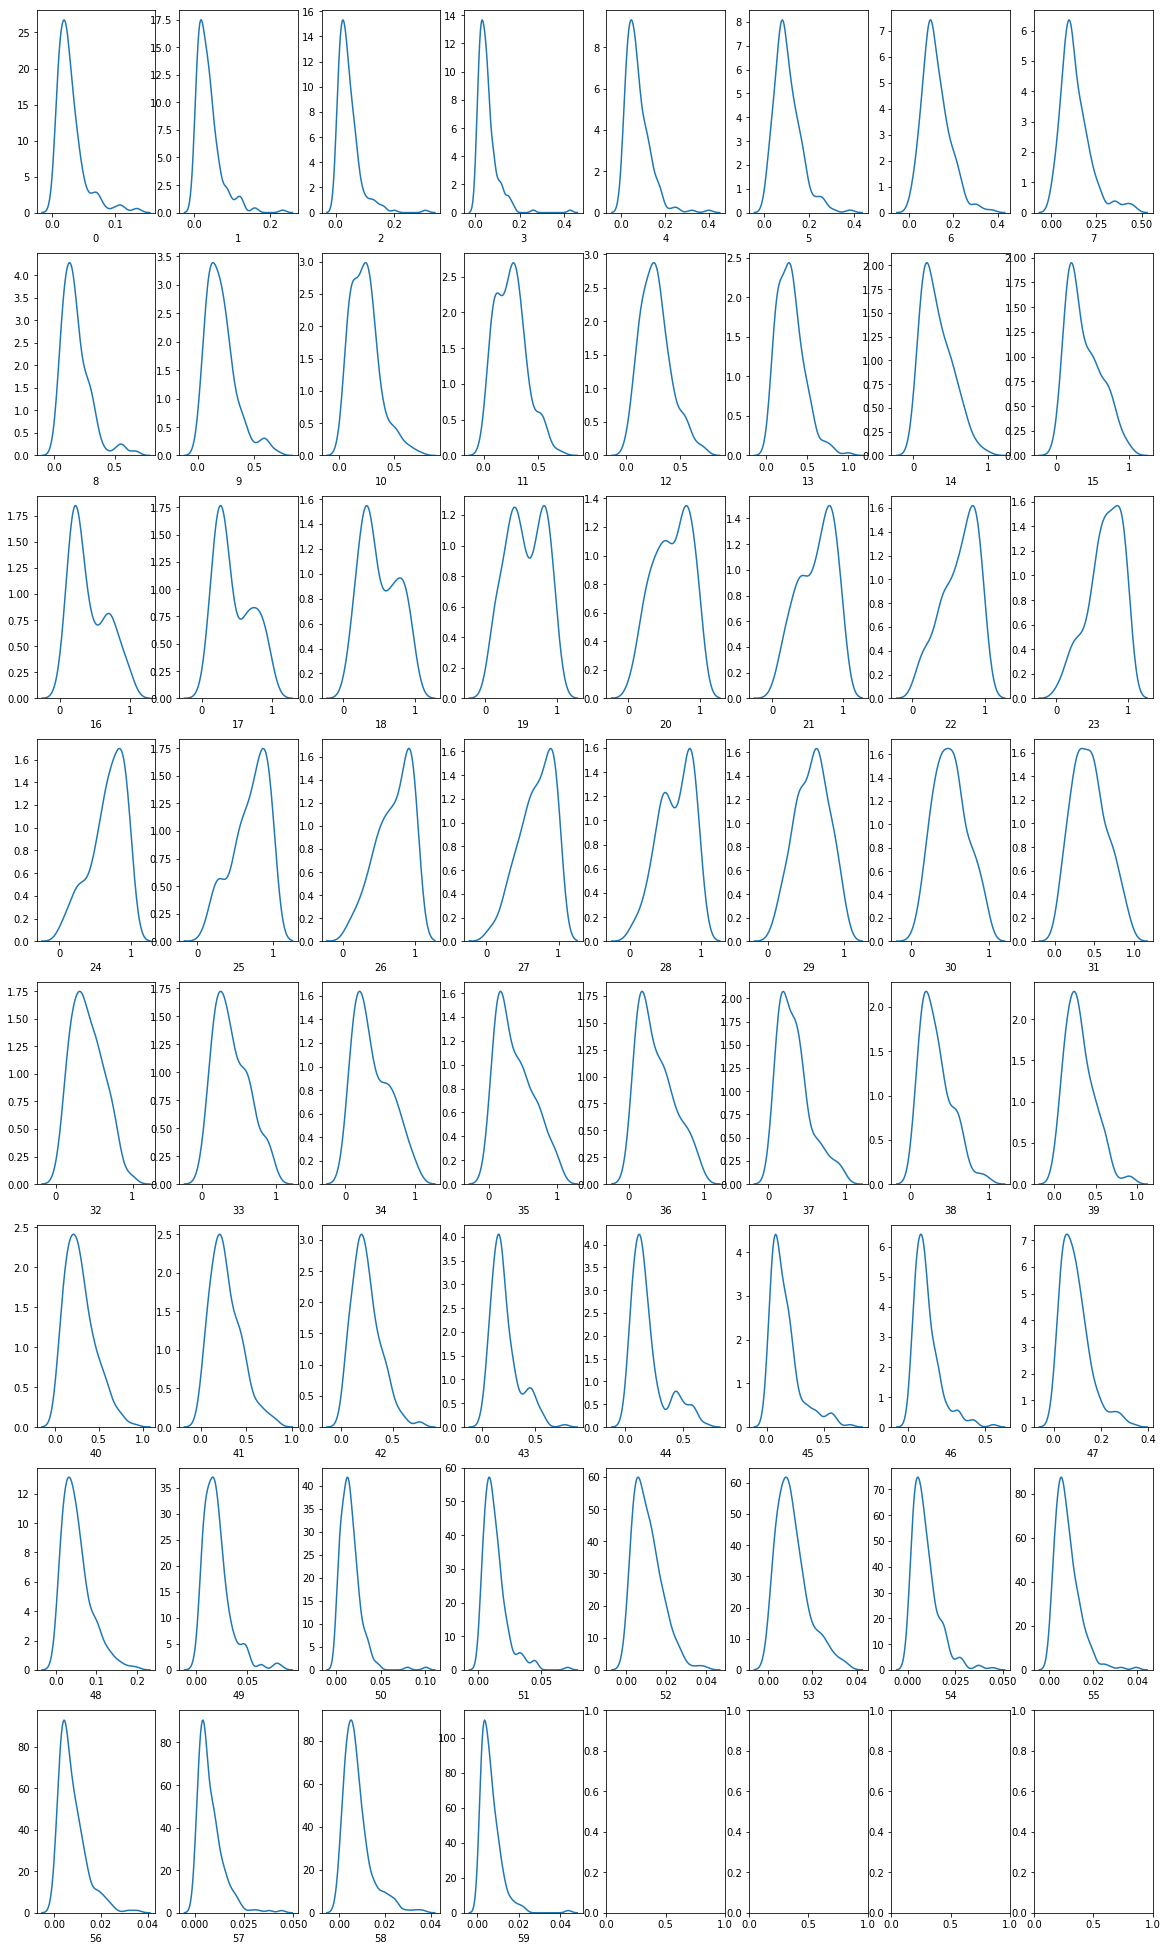

In [12]:
n_rows, n_cols = 8, 8
fig, axes = plt.subplots(ncols=n_cols,nrows=n_rows,sharex=False,sharey=False,figsize=(20,35))

curr_row, curr_col = 0, 0
for name in data.columns[:len(data.columns)-1]:
    sns.distplot(a=data[name],ax=axes[curr_row][curr_col],hist=False)
    curr_col+=1
    if curr_col==n_cols:
        curr_row+=1
        curr_col=0
        
# many attributes have a skewed distributuion (a power transform like box-cox that can correct the skew may be useful)

Many attributes have a skewed distributuion (a power transform like box-cox that can correct the skew may be useful)

# Boxplots

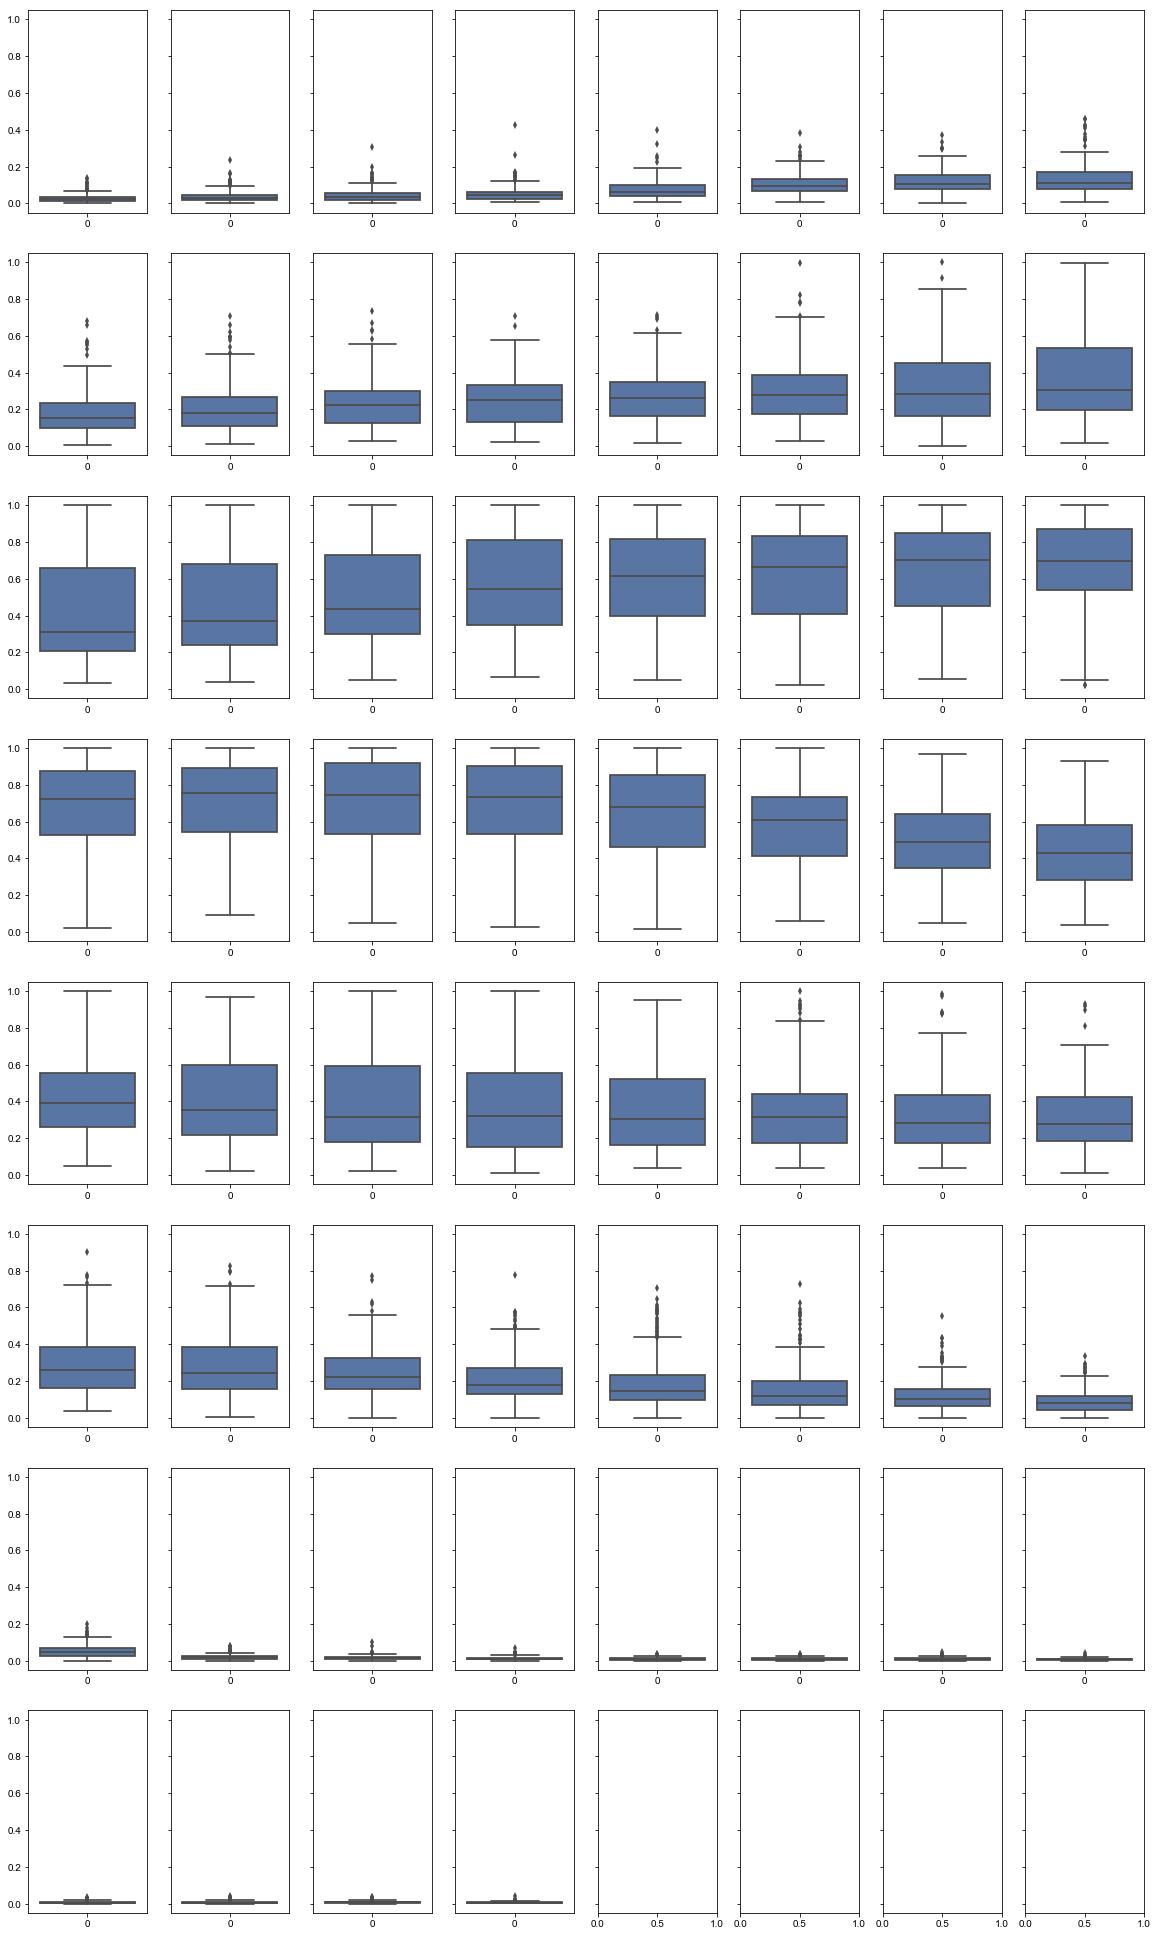

In [13]:
n_rows, n_cols = 8, 8
fig, axes = plt.subplots(ncols=n_cols,nrows=n_rows,sharex=False,sharey=True,figsize=(20,35))
sns.set(font_scale=1)

curr_row, curr_col = 0, 0
for name in data.columns[:len(data.columns)-1]:
    sns.boxplot(data=data[name],ax=axes[curr_row][curr_col])
    curr_col+=1
    if curr_col==n_cols:
        curr_row+=1
        curr_col=0

Attributes do have different spreads so standardizing may be a good idea

# Violinplot

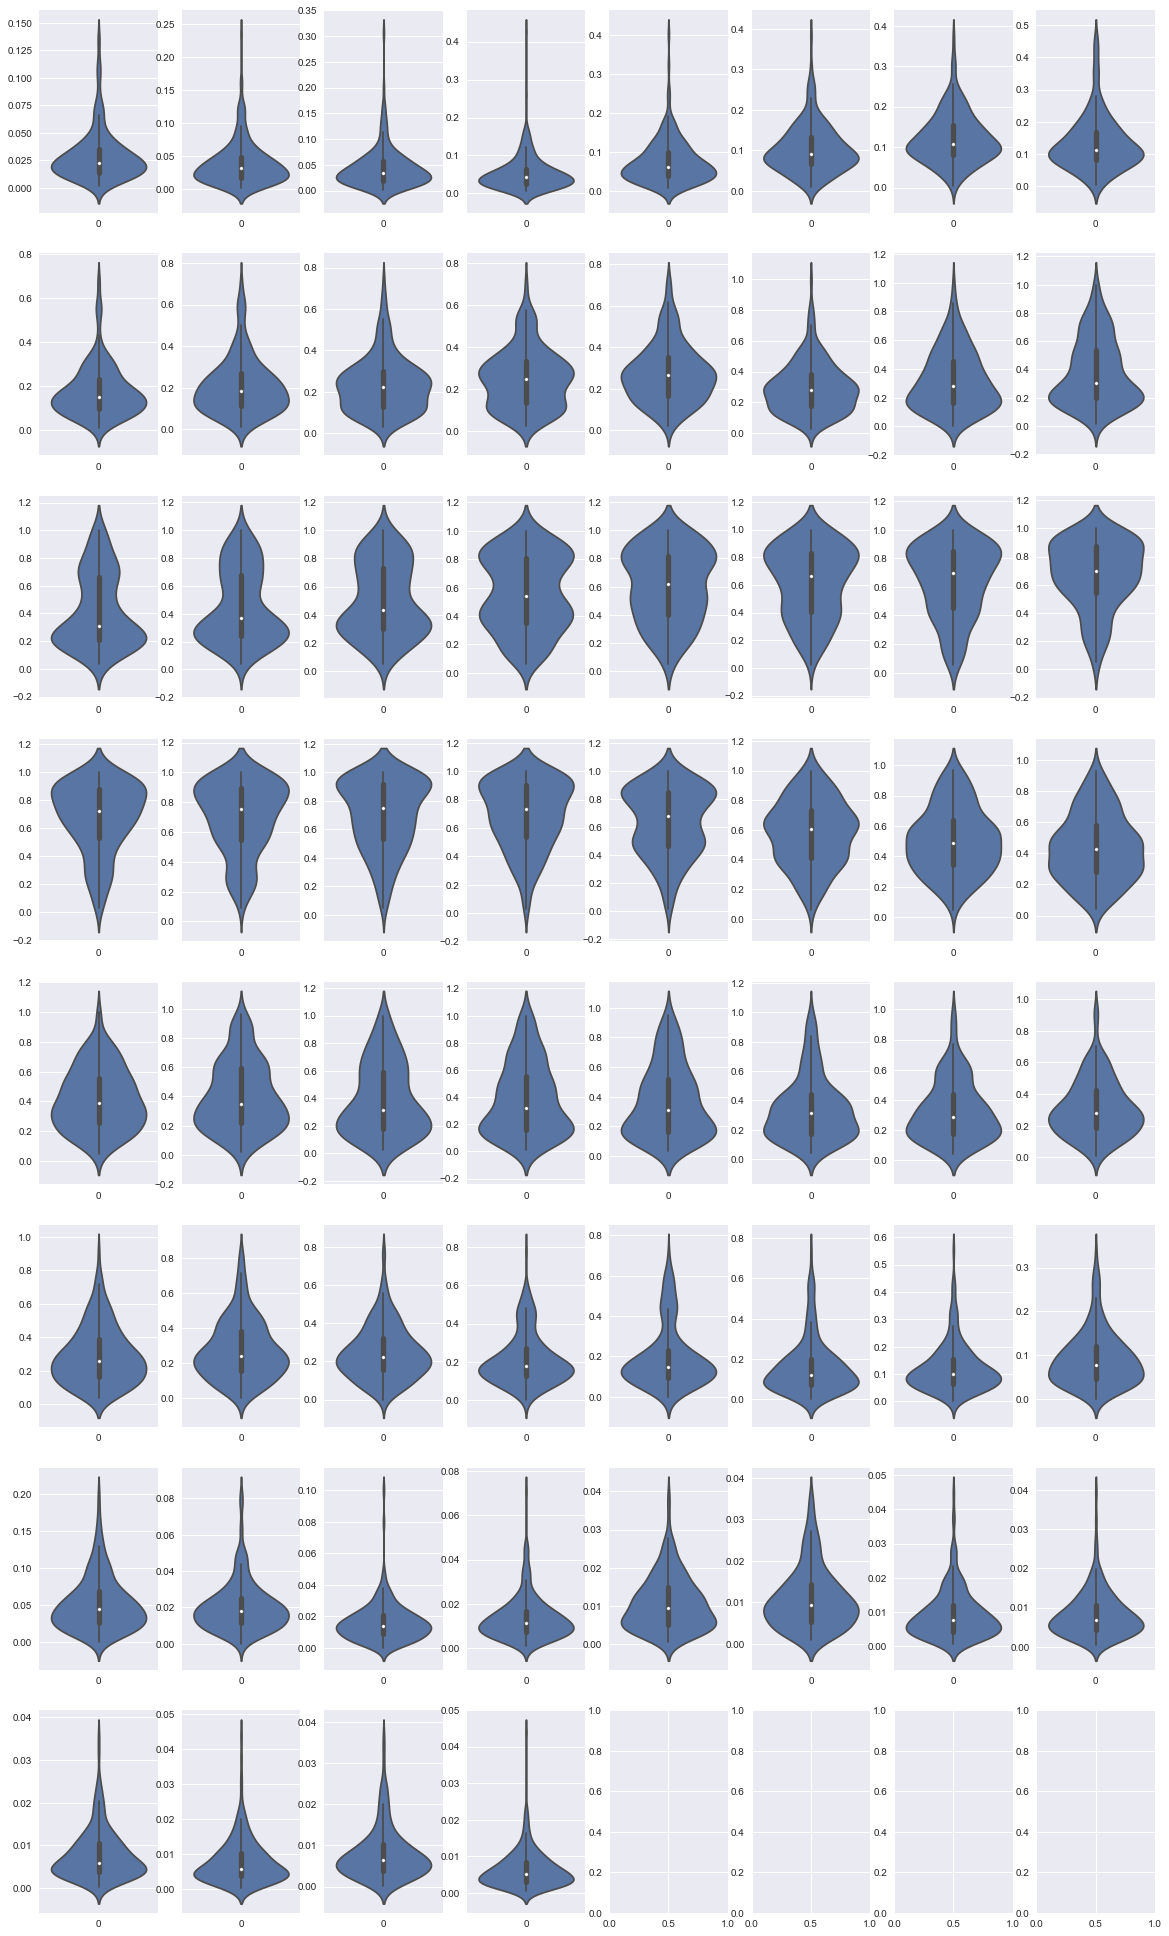

In [14]:
n_rows, n_cols = 8, 8
fig, axes = plt.subplots(ncols=n_cols,nrows=n_rows,sharex=False,sharey=False,figsize=(20,35))
sns.set(font_scale=1)

curr_row, curr_col = 0, 0
for name in data.columns[:len(data.columns)-1]:
    sns.violinplot(data=data[name],ax=axes[curr_row][curr_col])
    curr_col+=1
    if curr_col==n_cols:
        curr_row+=1
        curr_col=0

# Correlations

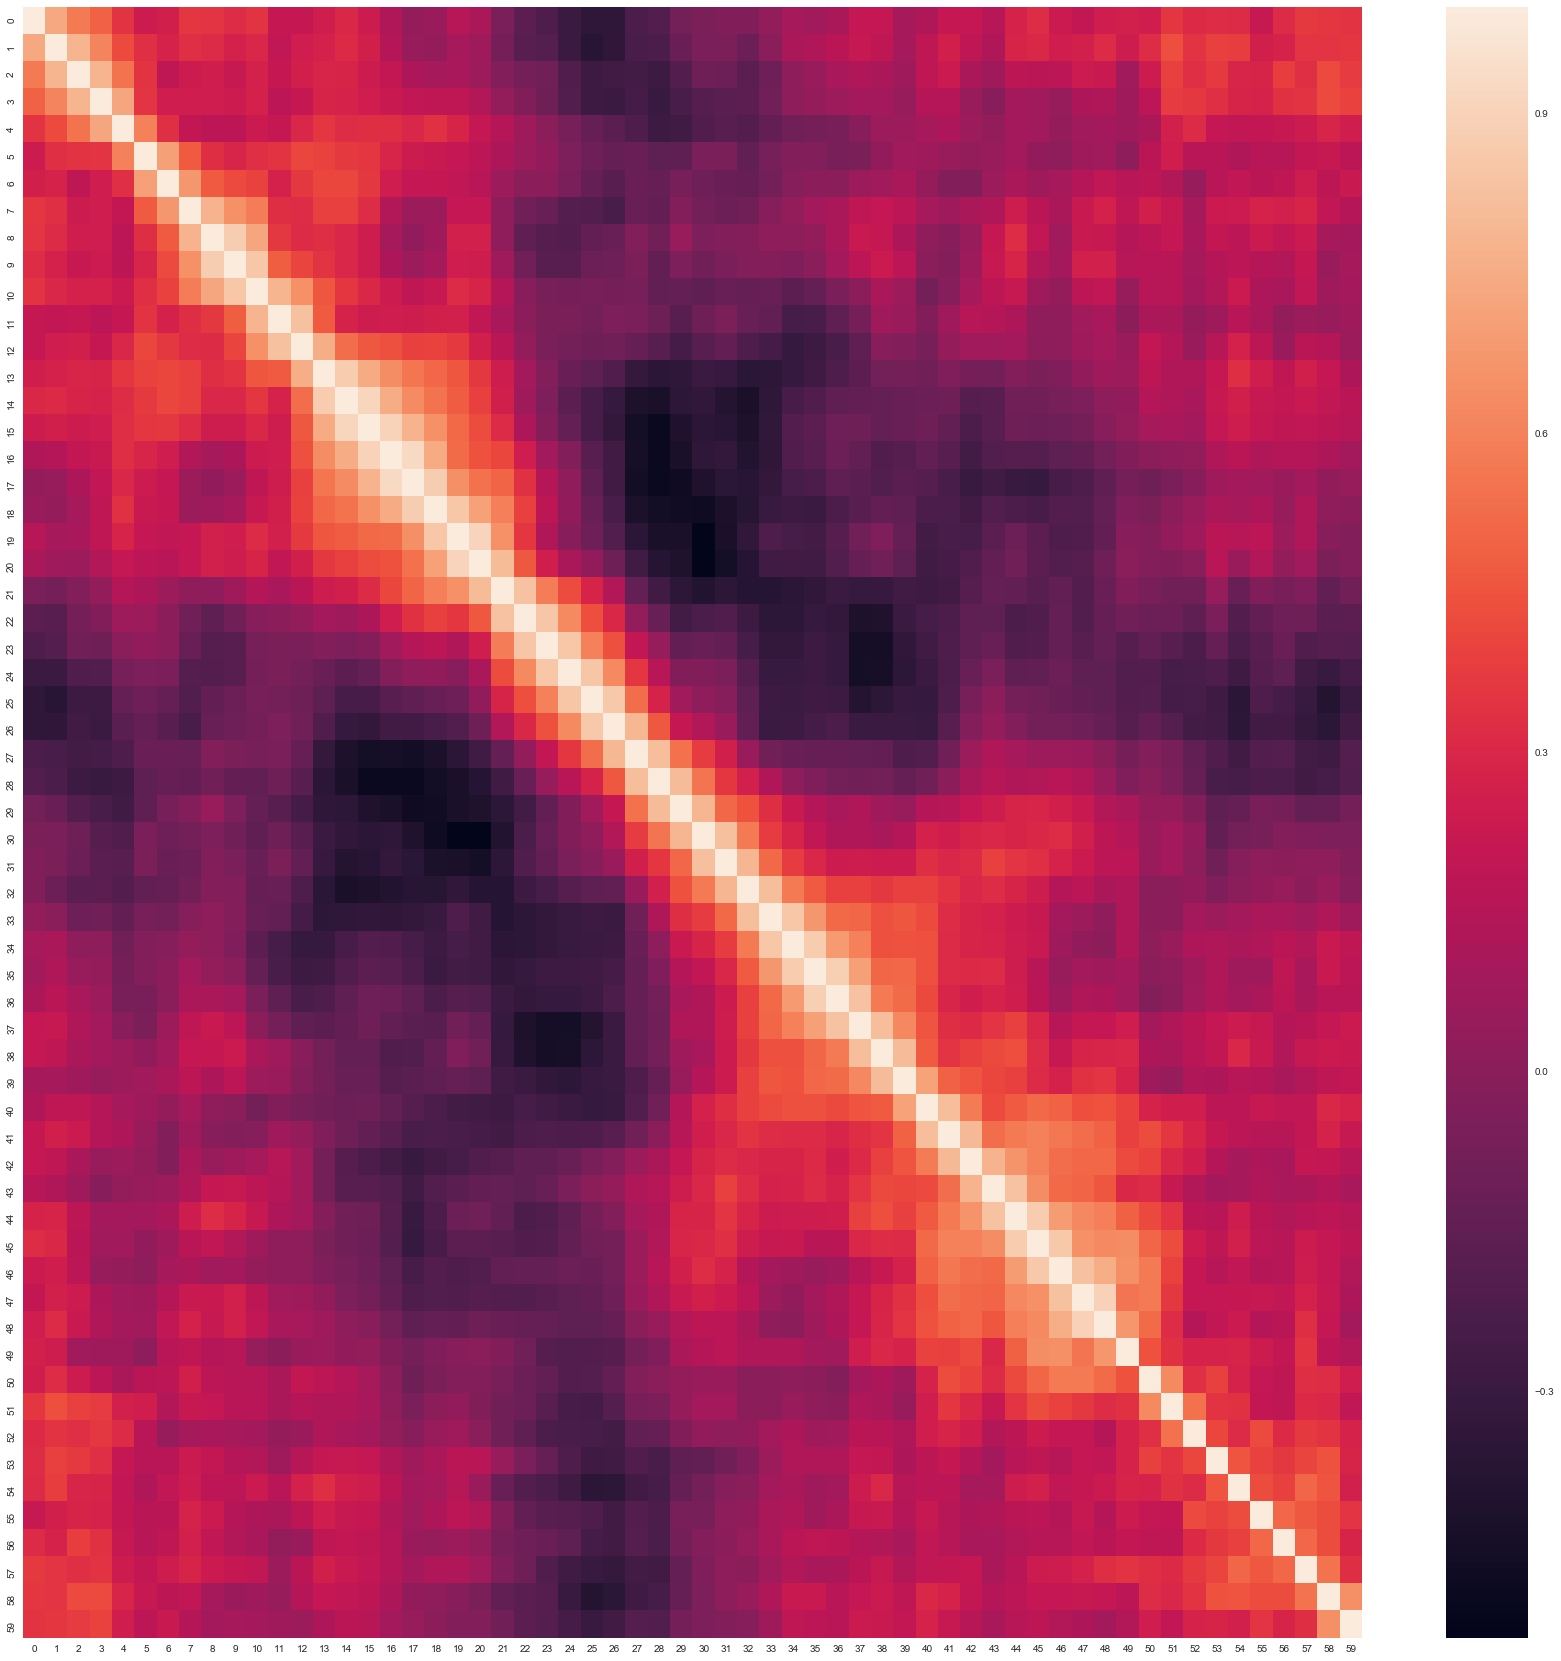

In [15]:
plt.subplots(figsize=(30,30))
sns.heatmap(data=data.corr())

light color around the diagonal suggests high correlation of attributes next to each other
dark color further suggests the negative correlations between distant attributes (which makes sense if the order of
attributes refers to the angle of the sensors)

### Some constants for the file

In [16]:
val_set_size = 0.2
seed = 7
n_folds = 10
scoring = 'accuracy'

# Divide the data into training and validation sets

In [17]:
values = data.values
X = values[:, :60].astype(float)
Y = values[:, -1]

X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=val_set_size,random_state=seed)

# Evaluate algorithms without any data transforms

In [18]:
models = []
models.append(('lr',LogisticRegression()))
models.append(('lda',LinearDiscriminantAnalysis()))
models.append(('knn',KNeighborsClassifier()))
models.append(('nb',GaussianNB()))
models.append(('cart',DecisionTreeClassifier()))
models.append(('svc',SVC()))

results = []
names = []
for name, model in models:
    k_fold = KFold(n_splits = n_folds,random_state=seed)
    
    curr_scores = cross_val_score(model,X_train,Y_train, cv=k_fold,scoring=scoring)
    
    results.append(curr_scores)
    names.append(name)
    
    print('%s: acc(%.3f%%) std(%.3f%%)'%(name,curr_scores.mean()*100,curr_scores.std()*100))
    
df = pd.DataFrame(data=np.array(results).T,columns=names)

# should look at boxplots because print values are means that can be pulled by outliers

lr: acc(78.272%) std(9.380%)
lda: acc(74.632%) std(11.785%)
knn: acc(80.809%) std(6.751%)
nb: acc(64.890%) std(14.187%)
cart: acc(71.765%) std(9.139%)
svc: acc(60.882%) std(11.866%)


## Boxplots to see, how models perform

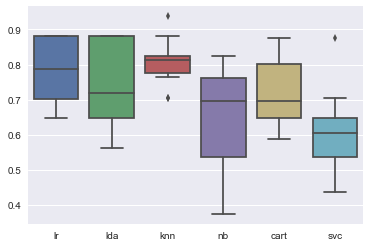

In [19]:
sns.boxplot(data=df)

knn is tight and has high accuracy

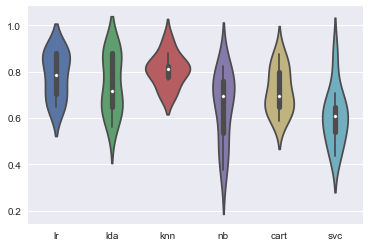

In [20]:
sns.violinplot(data=df)

# Evaluate algortihms on standardized data

In [21]:
pipes = []
pipes.append(('lr_scaled',
              Pipeline([('scaler', StandardScaler()),
                        ('lr', LogisticRegression())])))
pipes.append(('lda_scaled',
              Pipeline([('scaler', StandardScaler()),
                        ('lda', LinearDiscriminantAnalysis())])))
pipes.append(('knn_scaled',
              Pipeline([('scaler', StandardScaler()),
                        ('knn', KNeighborsClassifier())])))
pipes.append(('nb_scaled',
              Pipeline([('scaler', StandardScaler()),
                        ('nb', GaussianNB())])))
pipes.append(('cart_scaled',
              Pipeline([('scaler', StandardScaler()),
                        ('cart', DecisionTreeClassifier())])))
pipes.append(('svc_scaled',
              Pipeline([('scaler', StandardScaler()),
                        ('svc', SVC())])))

results = []
names = []
for name, model in pipes:
    k_fold = KFold(n_splits = n_folds,random_state=seed)
    
    curr_scores = cross_val_score(model,X_train,Y_train, cv=k_fold,scoring=scoring)
    
    results.append(curr_scores)
    names.append(name)
    
    print('%s: acc(%.3f%%) std(%.3f%%)'%(name,curr_scores.mean()*100,curr_scores.std()*100))
    
df_scaled = pd.DataFrame(data=np.array(results).T,columns=names)

lr_scaled: acc(73.419%) std(9.589%)
lda_scaled: acc(74.632%) std(11.785%)
knn_scaled: acc(82.574%) std(5.451%)
nb_scaled: acc(64.890%) std(14.187%)
cart_scaled: acc(70.478%) std(9.416%)
svc_scaled: acc(83.640%) std(8.870%)


# Choose the best model on scaled data

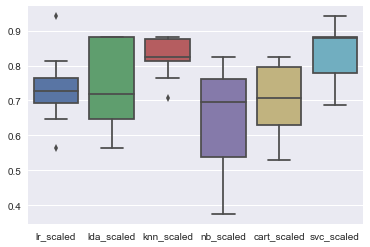

In [22]:
sns.boxplot(data=df_scaled)

knn and svc look as good candidates for tuning

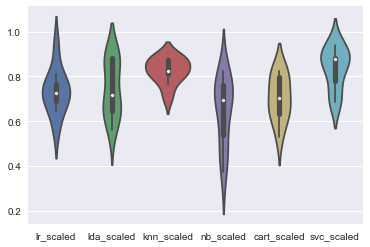

In [23]:
sns.violinplot(data=df_scaled)

In [24]:
def print_grid_search_cv_results(grid_results):
    print('Best: %f%% Using: %s'%(grid_results.best_score_*100,grid_results.best_params_))
    means = grid_results.cv_results_['mean_test_score']
    stds = grid_results.cv_results_['std_test_score']
    params = grid_results.cv_results_['params']

    for m,s,p in zip(means,stds,params):
        print('%.3f%% (%.3f%%) with %r'%(m*100,s*100,p))

# Tune knn

In [25]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

param_grid = {'n_neighbors':np.arange(1,22,2)} 

model = KNeighborsClassifier()
k_fold = KFold(n_splits=10,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=k_fold,scoring=scoring)
grid.fit(X_train_scaled,Y_train)
print_grid_search_cv_results(grid)

Best: 84.939759% Using: {'n_neighbors': 1}
84.940% (5.988%) with {'n_neighbors': 1}
83.735% (6.630%) with {'n_neighbors': 3}
83.735% (3.750%) with {'n_neighbors': 5}
76.506% (8.951%) with {'n_neighbors': 7}
75.301% (8.698%) with {'n_neighbors': 9}
73.494% (10.489%) with {'n_neighbors': 11}
73.494% (10.584%) with {'n_neighbors': 13}
72.892% (7.587%) with {'n_neighbors': 15}
71.084% (7.872%) with {'n_neighbors': 17}
72.289% (8.456%) with {'n_neighbors': 19}
71.084% (10.883%) with {'n_neighbors': 21}


# Tune svc

In [26]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

param_grid = {'C':np.linspace(0.1,2,10),'kernel':['linear', 'poly', 'rbf', 'sigmoid']} 

model = SVC()
k_fold = KFold(n_splits=10,random_state=seed)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=k_fold,scoring=scoring)
grid.fit(X_train_scaled,Y_train)
print_grid_search_cv_results(grid)
# better that tuned knn

Best: 86.746988% Using: {'C': 1.788888888888889, 'kernel': 'rbf'}
75.904% (9.886%) with {'C': 0.1, 'kernel': 'linear'}
53.012% (11.878%) with {'C': 0.1, 'kernel': 'poly'}
57.229% (13.034%) with {'C': 0.1, 'kernel': 'rbf'}
70.482% (6.636%) with {'C': 0.1, 'kernel': 'sigmoid'}
74.699% (9.407%) with {'C': 0.3111111111111111, 'kernel': 'linear'}
64.458% (13.229%) with {'C': 0.3111111111111111, 'kernel': 'poly'}
76.506% (9.969%) with {'C': 0.3111111111111111, 'kernel': 'rbf'}
73.494% (5.463%) with {'C': 0.3111111111111111, 'kernel': 'sigmoid'}
74.096% (8.303%) with {'C': 0.5222222222222223, 'kernel': 'linear'}
68.072% (11.521%) with {'C': 0.5222222222222223, 'kernel': 'poly'}
78.916% (8.039%) with {'C': 0.5222222222222223, 'kernel': 'rbf'}
75.301% (6.236%) with {'C': 0.5222222222222223, 'kernel': 'sigmoid'}
74.699% (8.453%) with {'C': 0.7333333333333333, 'kernel': 'linear'}
75.301% (13.440%) with {'C': 0.7333333333333333, 'kernel': 'poly'}
81.928% (7.893%) with {'C': 0.7333333333333333, 'ke

# Check performance of ensemble methods 
(no standardization used because all algorithms based
on decision trees, which is less sensitive to data distributions)

In [27]:
ensembles = []
ensembles.append(('ada', AdaBoostClassifier()))
ensembles.append(('grad_boost', GradientBoostingClassifier()))
ensembles.append(('rf', RandomForestClassifier()))
ensembles.append(('et', ExtraTreesClassifier()))

results = []
names = []
for name, ensemble in ensembles:
    k_fold = KFold(n_splits=n_folds, random_state=seed)

    curr_scores = cross_val_score(
        ensemble, X_train, Y_train, cv=k_fold, scoring=scoring)

    results.append(curr_scores)
    names.append(name)

    print('%s: acc(%.3f%%) std(%.3f%%)' % (name, curr_scores.mean() * 100,
                                           curr_scores.std() * 100))

df_ensemble = pd.DataFrame(data=np.array(results).T, columns=names)

ada: acc(81.397%) std(6.602%)
grad_boost: acc(84.779%) std(11.316%)
rf: acc(76.434%) std(14.289%)
et: acc(77.574%) std(7.609%)


# Plot ensemble performance results

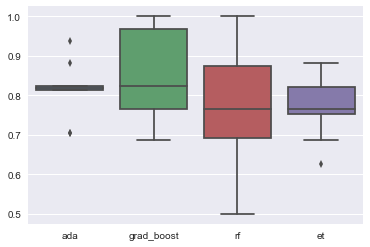

In [28]:
sns.boxplot(data=df_ensemble)

grad_boost may be worth further tuning because of good mean an spread skewed up towards 90s

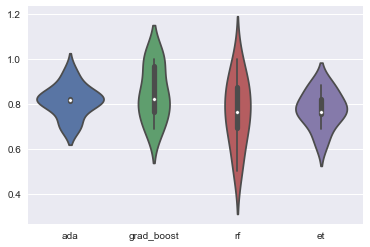

In [29]:
sns.violinplot(data=df_ensemble)

# Finalize the model using svc, which showed the best performance

Accuracy: 92.857%
             precision    recall  f1-score   support

          M       0.96      0.93      0.94        27
          R       0.88      0.93      0.90        15

avg / total       0.93      0.93      0.93        42



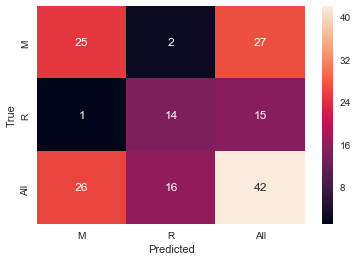

In [30]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

model = SVC(C=1.79,kernel='rbf')
model.fit(X_train_scaled,Y_train)

X_val_scaled = scaler.transform(X_val)
Y_pred = model.predict(X_val_scaled)
print('Accuracy: %.3f%%'%(accuracy_score(Y_val,Y_pred)*100))
print(classification_report(Y_val, Y_pred))
df = pd.crosstab(Y_val, Y_pred,rownames=['True'],colnames=['Predicted'],margins=True)
sns.heatmap(df,annot=True)

# The final performance: 93%